# INFO 2950 Project Phase IV
Tina Chen (tc663), Catherine Fang (cf533), Vicki Chen (vc332)

## Table of Contents: EDIT!!!!
1. [Introduction](#introduction)
    - [Background Information and Context](#background)
    - [Key Terms and Data Sources](#key)
    - [Research Questions](#researchquestions)
    - [Summary of Findings](#overview)
2. [Data Description and Cleaning](#cleaning)
    - [Raw Dataset Description]()
    - [Cleaned Dataset Description]()
3. [Preregistration Statments]()
    - [1: Multivariable Logistic Regression]()
    - [2: Currency and Success T-test]()
4. [Data Analysis]()
    - [Successful Campaigns Over Time]()
5. [Q1: Is there a relationship between lower test scores/more failures and higher alcohol consumption?](#Q1)
    - [Linear Regression](#linRegQ1)
    - [Permutations](#permute)
5. [Q2: Can parental status have an impact on their high school aged child's consumption?](#Q2)
    - [Q2.1: Would a high schooler with parents who both work in healthcare drink less?](#Q2.1)
    - [T-test](#ttest)
6. [Evaluation of Significance]()
7. [Limitations](#limitations)
8. [Conclusion](#conclusion)
9. [Acknowledgements and Bibliography](#references)

## Introduction

** Note: In this document, the phrases, 'Kickstarter campaign' and 'Kickstarter project' are used interchangeably.

Kickstarter is a crowdfunding website that allows creators to create fundraising campaigns to fund startups, products, and projects to help them become a reality. Kickstarter campaigns have many factors that can influence how likely they are to successfully reach their target fundraising goal. These factors include category of the project, duration of a project, location the project is based in, original currency of the campaign, and number of backers. The focus of our research is to examine the factors that lead to a project being successful to identify any predictors of project success, and determine which factors are the best predictors of a project's success. 

Previous research had been done on a similar Kickstarter datatset, mainly using R, with analyses on amount of projects per category and type of category on success. Results show that the Film & Video category has the greatest amount of projects, but though the Dance category has the smallest quantity, it has the highest success rate (Kim, 2024). However, this research only used linear regression models to predict the relationship between categories and success, and also took canceled and suspended projects into account. Our project takes a narrower view on success as a binary variable with unsuccessful being defined as a failed project, since canceled and suspended projects are projects that have been stopped prematurely due to outside factors, rather than the variables we're analyzing. We'll also be implement logistic regression models rather than linear regressions because they're a better fit for the relationship, since our output will be a binary variable. We'll also expand on past research to analyze multiple predictors of success, and how they might correlate with one another to influence the outcome of a campaign. 

Research Question: Are there any relationships between the predictors (category of project, location, duration of project, currency, number of backers) and the success of a Kickstarter project?
- What is the relationship between the category of the campaign and the average campaign goals for each category, by success vs failed projects? Are the two correlated with one another, and which influence success more? 
  - Which category has the highest number of successful campaigns?
- What is the relationship between the project goal and the number of backers of a successful project? Does higher project goals lead to higher number of backers of a successful project?
- How does the length of a project impact the amount of money raised, regardless of whether or not its successful?
  - Is there is optimal project duration to optimize chances of success?
- How do Kickstarter project success rates compare for US vs Non-US based projects?
-   How do projects' success rates compare considering the projects' orignal currencies? 
- Which year has the most projects that were successful?

Findings to this project can help individuals with potential Kickstarter campaign ideas optimize their chances of success launching a campaign. 

## Data Description and Data Cleaning

### Raw Dataset Description

The attributes (columns) of the clean dataset are the PID (Project ID), Category (numbers indicating what topic the project falls under), Subcategory (numbers indicating the subtopics within each category), the Project Location Name, State, County, and Country. Other relevant attributes included are the Project Currency, the Project’s Original Goal (how much money the creators were aiming for), amount of money pledged, the number of backers, the launched date, deadline date, and state. State is defined as either suspended (funding for a project is stopped when the project violates Kickstarter’s rules), canceled (the creators of a project dropped the project themselves), failed (the project didn’t meet funding goals), and successful (project meets funding goals). Each observation (row) corresponds to one unique project, indexed with a CaseID.

The raw dataset was created by Jonathan Leland, Kickstarter’s Head of Insights for a cross-sectional study on the different creative projects that seek crowdfunding. He created the dataset to observe data on the projects from Kickstarter. 

The creation of this dataset is funded by Kickstarter Data, the company crowdfunding platform that directs the Kickstarter Project. The study is distributed through the Inter-University Consortium for Political and Social Research (ICPSR). 

Some columns were presented as optional for users to fill out, so in the raw data there are some rows with missing values. For example, for the PROJECT_LOCATION_STATE, PROJECT_LOCATION_COUNTY, PROJECT_LOCATION_COUNTRY column, there are rows with blank values. However, there are no missing values in the PROJECT_LOCATION_NAME, meaning that the project creators were required to put down the location name for their project. 

ICPSR processed the data by creating variable/value labels, creating an online analysis version with question text, and 
checked the data for undocumented or out-of-range codes. In addition, several restrictions were placed on the data before releasing it for public use to ensure survey participant anonymity. The data was split into a public-use file, a restricted-use file, and file containing information on the backers of projects. 

ICPSR datasets are checked for condidentiality of survey participants. The names of the people/groups who created past Kickstarter projects (NAME) and the links to their projects’ websites (URL_NAME), and the descriptions of their projects (BLURB) are not shown in the public data set that was used as the raw dataset for this project. This ensures anonymity of survey participants and prevents disclosure risk from survey participants.

Raw Data was collected by downloading the delimited data from the study at this link, https://www.icpsr.umich.edu/web/ICPSR/studies/38050/summary and Git Large Language Storage was used to upload the raw files onto Github. 


### Cleaned Dataset Description

The clean dataset was tailored according to our research questions. We dropped redacted information (NAME, PROJECT_PAGE_LOCATION_COUNTRY, URL_NAME) and other attributes we did not need to answer our research question ("SUBCATEGORY", "UID", "PROJECT_PAGE_LOCATION_STATE", "PROJECT_PAGE_LOCATION_COUNTY").

We kept the Category, PROJECT_PAGE_LOCATION_NAME, PROJECT_CURRENCY, GOAL_IN_ORIGINAL_CURRENCY, PLEDGED_IN_ORIGINAL_CURRENCY, GOAL_IN_USD, PLEDGED_IN_USD, BACKERS_COUNT, LAUNCHED_DATE, DEADLINE_DATE, and STATE attributes since we directly need them to find relationships between their impact on the STATE (success or failure of the project).

This version of the clean dataset was created by Tina Chen (tc663), Catherine Fang (cf533), and Vicki Chen (vc332) to find any predictors of a Kickstarter project's success and gain insights from past Kickstarter projects to help future Kickstarter campaigns succeed and avoid any predictors of failure.  

The creation of this dataset was not funded.

Since the raw dataset was created from survey data and survey participants were from a wide variety of countries with many different languages, the survey's collected data may be subject to participant error, misinterpretations, and language barriers. In addition, only the public dataset was available for public download, and thus, the NAME, PROJECT_PAGE_LOCATION_COUNTRY, and URL_NAME were not available and could only be found in the restricted dataset. In addition, since our research question only took into consideration factors for predicting the success and failure of a project, we did not include canceled or suspended projects in our cleaned dataset. 

Preprocessing of the raw dataset was done by Jonathan Leland and distributed by the Inter-University Consortium for Political and Social Research (ICPSR). Details of the preprocessing can be found in the Raw Dataset Description section, found above.

As above, in the raw dataset, the anonymity of survey particpants was preserved during the creation of the raw dataset and we did not attempt to violate their anonymity during the creation of this cleaned dataset. Survey particpants expected the raw dataset to be used for research purposes only, provided their anonymity was not preserved, but we are able to use the publically available dataset since the preprocessing of the public dataset preserved survey particpants' anonymity.

The cleaned dataset summary be found at this Github link: https://github.com/catherine-fang-git/info2950finalproject/blob/main/data_cleaning.ipynb

## **Preregistration Statements**

#### **1. Multivariable Logistic Regression**

*Note: This is a combination of Hypothesis 1 and Hypothesis 3 from Phase 3 after receiving feedback that we should consider including more factors in the regression. We realized that these two preregistration statements were similar in that we were comparing a variable to the success rate and it may be interesting to analyze factors that are established prior to a campaign being launched and its relationship to success.

**Hypothesis: Multiple variables will result in better predictions of a whether a campaign is likely to succeed or not.**

Both hypotheses will have a null hypothesis that the respective independent variable's coefficient is 0, which would indicate that the variable has no effect on success.
 - Hypothesis 1: We hypothesize that projects with a lower campaign goal will result in a higher success rate, because a lower campaign goal would not require as many people to pledge to the campaign compared to a campaign with a higher campaign goal to reach the goal and be successful. The alternative hypothesis is that campaign goal coefficient is less than 0.

 - Hypothesis 2: We expect that projects with a larger time difference between launch and deadline will have a greater likelihood of success because a longer campaign duration may allow for more backers to support and pledge to the campaign, increasing the chances of the campaign to be successful. The alternative hypothesis is that campaign goal coefficient is less than 0. 

**Analysis**:
A logistic regression with multiple variables will be performed to determine if success is greater with multiple predictors as inputs. These predictors will be duration of project, and campaign goal. These inputs were chosen as they are factors that are determined before a campaign is launched compared to variables such as number of backers or amount pledged, which are variables determined after a campaign is launched. Performing a multivariable regression may help to explain how there are many factors that can lead to the success of a campiagn, which can not be explained by just one factor. We expect that 

(will add to analysis later)
First, calculate the correlation between time difference and success, to see if there is a strong relationship between the two variables. Then, run a logistic regression model where we input the time difference and output success (a dummy variable, based on whether they meet their campaign goal or not). We can perform a one-sided hypothesis test to check the significance of the relationship, with our null hypothesis being that there is no significant relationship between time difference and likelihood of success, and the alternative hypothesis being that there is a positive relationship between time difference and success. 

We will split the data into training and testing sets, and use a significance level of alpha = 0.05. 

Permutation tests will also be performed on the variables to see if the data is significant or it is just by chance.

#### **2. Original Currency vs Success Rate**

It was found in Phase 2 that the average success rate of all currencies is 0.459, the minimum average success rate is 0.346 and is MXN (Mexican Pesos), and the maximum average success rate is 0.698 and is HKD (Hong Kong Dollars). 

There is a range of 15 different original currencies that Kickstart campaigns have used when collecting funds. These currencies are listed in order of most number of successful campaigns: (USD, GBP, EUR, CAD, AUD, HKD, MXN, SEK, JPY, SGD, NZD, DKK, CHF, NOK, PLN). 

**Hypothesis:** Campaigns using HKD is significantly more successful than the average Kickstarter campaign, and campaigns using MXN is not significantly less successful than the average Kickstarter campaign.

1 - The Null Hypothesis, H<sub>0</sub> is that the original currency HKD is not significantly more successful than other Kickstarter campaigns, on average. The Alternative Hypothesis, H<sub>1</sub> is that HKD is signficantly more successful than other Kickstarter campaigns, on average.


2 - The Null Hypothesis, H<sub>0</sub> is that the original currency MXN is not significantly less successful than other Kickstarter campaigns, on average. The Alternative Hypothesis, H<sub>1</sub> is that MXN is signficantly less successful than other Kickstarter campaigns, on average.

**Analysis**:

In order to find if certain currencies like HKD and MXN are significantly more successful or significantly more unsuccessful than the average project that uses one of the other 13 currencies, we need to conduct an independent t-test. More specifically, we will conduct 2, one-sided t-tests that each have 1 null and 1 alternative hypothesis.

We will use the scipy.stats method, ttest_ind and choose specific categories to test for significance to avoid p-hacking.

We are able to conduct a t-test because the statistic we are testing for, average success rate, is normally distributed, as shown in the horizontal bar graph calculated in Phase 2 (Exploratory Data Analysis), or [later in this file](#horiz_currency_bargraph)

We will then need to encode the categorical variables, currency, to numerical ones to conduct an LLS and then check for the significance of certain varaibles in the LLS using the Wald test.


## **Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
import seaborn as sns
import duckdb
import statsmodels.api as sm
from sklearn import preprocessing
import math
from scipy.stats import ttest_ind

Below we imported our cleaned data (kickstarter_data.csv). More detailed data cleaning steps can be found in the data_cleaning.ipynb file.

In [2]:
kickstarter_data = pd.read_csv("kickstarter_data.csv")
print(kickstarter_data.head())

     category project_location original_currency  goal_original_currency  \
0       Games            Osaka               JPY                68000000   
1       Games            Tokyo               JPY                53808516   
2       Games         Ishikawa               JPY                45000000   
3       Games        Chiba-shi               JPY                16665000   
4  Technology            Tokyo               JPY                15000000   

   pledged_orginal_currency  goal_usd  pledged_usd  num_backers  success  \
0                  81030744    623968       743538        12613        1   
1                 481621841    510735      4571420        46307        1   
2                  98863825    414327       910266         8051        1   
3                  23606140    148285       210047         1705        1   
4                  17406300    133229       154601          656        1   

   duration_in_days  launched_year  
0                40           2018  
1           

### Data Summary

We wanted to explore our dataset and determine how large of a dataset we are working with. We also wanted to find the success rate to determine how much of our dataset are successful projects. Since the success rate came out to be around 46.7%, this means our dataset is relatively equally split between successful and nonsuccessful campaigns, with slightly more nonsuccessful campaigns.

In [81]:
total = len(kickstarter_data)
success = kickstarter_data[kickstarter_data["success"] == 1].count()
print(f"Total Campaigns: {total}")
print(f"Success Rate {np.round(success["success"]/total, 3)}")

Total Campaigns: 539385
Success Rate 0.467


### Correlation Heat Map of Predictors

We plotted a correlation heat map to see if there are any strong correlations between our predictors that we plan to analyze. Since our main research question focuses on determining predictors of success, we wanted to make sure that there may not be any collinearity between variables. Since success in our dataset is a binary variable, we can not find the correlation between each factor and the success itself, so it was not included in the correlation map.

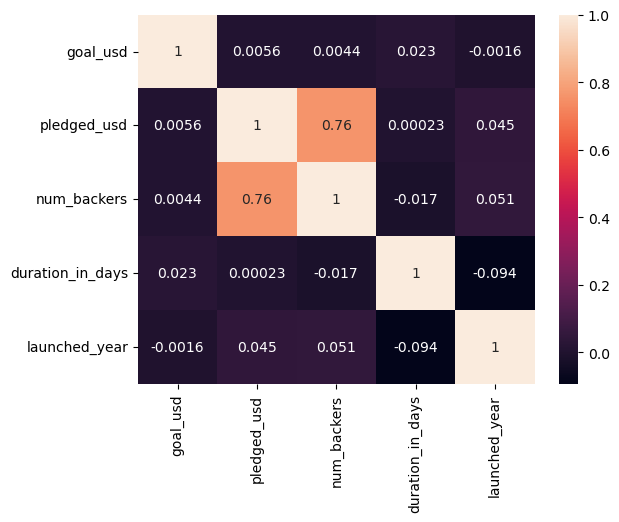

In [3]:
corr = kickstarter_data[["goal_usd","pledged_usd", "num_backers",
                         "duration_in_days", "launched_year"]].corr()
sns.heatmap(corr, annot = True)
plt.show()

This heatmap shows the correlation bewteen different predictors of success. Since there is a high correlation between amount pledged in USD and the number of backers, this is an indicator of collinearity between these 2 factors. The success column was not included in the correlation heat map because since it is a binary variable, the values shown on the heatmap would not provide meaningful information about the relationship between variables and success.

### Campaigns Over Time

We plotted the year the Kickstarter campaign was launched versus the number of Kickstarter campaigns in that year. In the bar graph below, this graph indicates that the most amount of campaigns were launched during 2015.

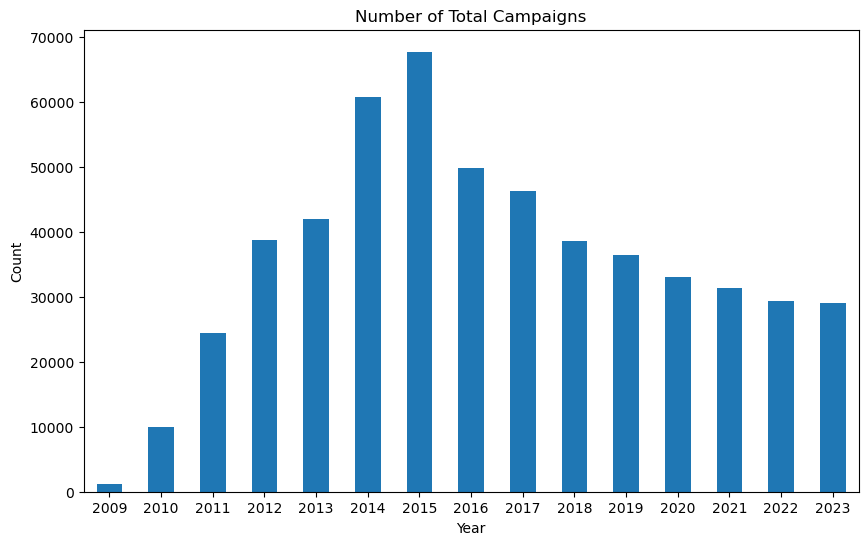

In [4]:
campaigns_by_yr = kickstarter_data["launched_year"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 0, figsize = (10, 6), fontsize = 10, title = "Number of Total Campaigns")
campaigns_by_yr.set_xlabel("Year")
campaigns_by_yr.set_ylabel("Count")
plt.show()

We were curious if this trend followed in how many successful projects there were in each year since it may be possible the economy was better in certain years or Kickstarter might've been more popular during this time that prompted more campaigns to be launched.

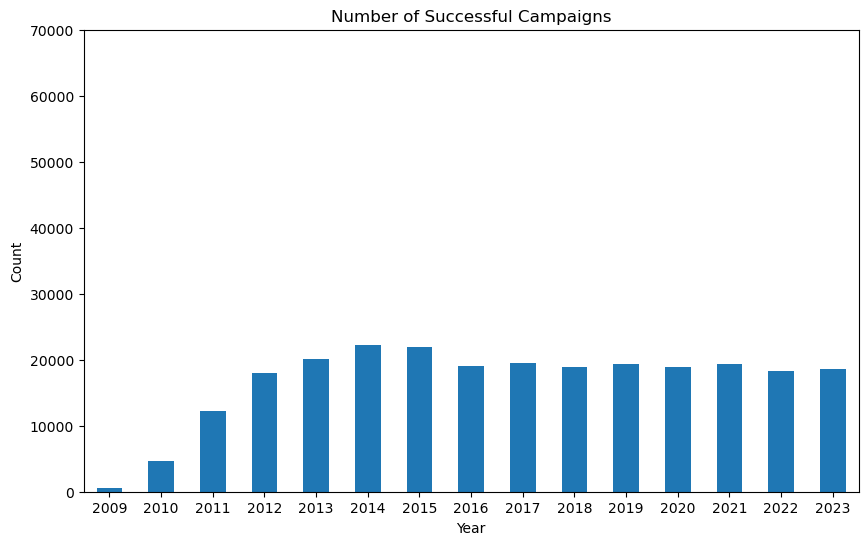

In [5]:
success_proj = kickstarter_data[kickstarter_data["success"] == 1]
success_campaigns_by_yr = success_proj["launched_year"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                        rot = 0, figsize = (10, 6), fontsize = 10, title = "Number of Successful Campaigns")
success_campaigns_by_yr.set_xlabel("Year")
success_campaigns_by_yr.set_ylabel("Count")
plt.ylim(0,70000)
plt.show()

Based on the bar graph, it seems that each year after 2012 have similar numbers of successful campaigns. This lack of successful campaigns in earlier years follows the trend of total campaigns and may be due to the lack of popularity of Kickstarter as it was founded in 2009. The years 2014 and 2015 are slightly higher than the rest of the years but not that significant, which indicates that the success of a campaign is fairly consistent throughout each year.

### Categories

#### Overall Success of Categories

We plotted the number of the Kickstarter campaigns in each category. In the bar graph below, this graph indicates that the most common campaign category is "Film & Video".

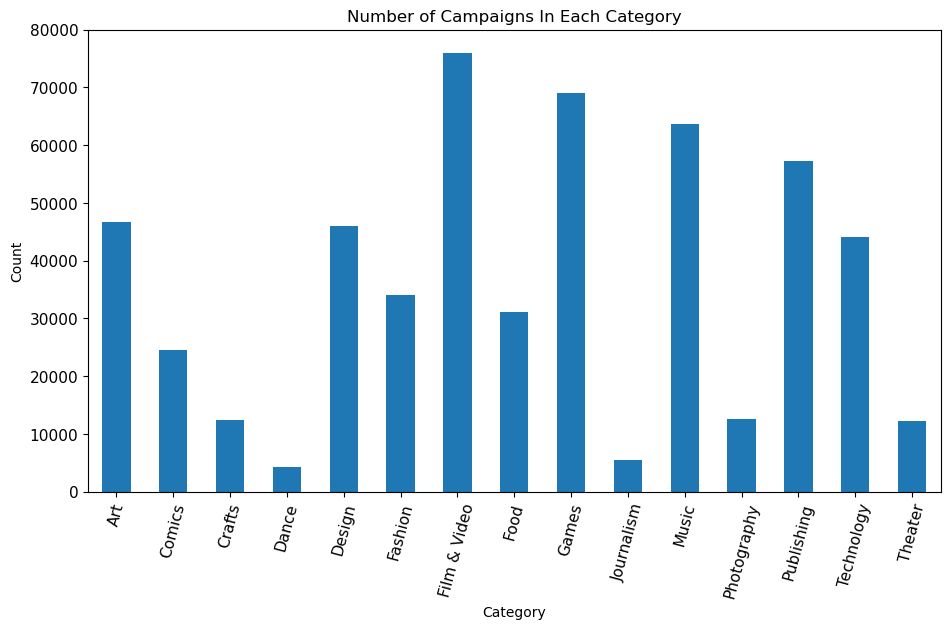

In [6]:
category = kickstarter_data["category"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 75, figsize = (11, 6), fontsize = 11, 
                    title = "Number of Campaigns In Each Category")
category.set_xlabel("Category")
plt.ylim(0,80000)
category.set_ylabel("Count")
plt.show()

We were interested to see whether the most popular category would also have the most amount of successful campaigns and plotted a bar graph for such.

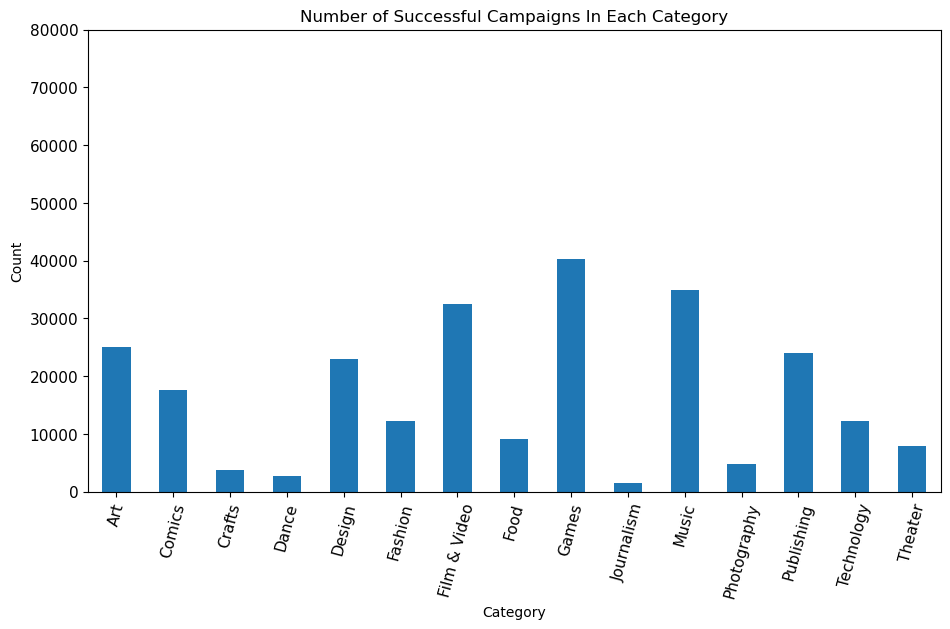

In [7]:
success_proj = kickstarter_data[kickstarter_data["success"] == 1]
scategory = success_proj["category"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 75, figsize = (11, 6), fontsize = 11, 
                    title = "Number of Successful Campaigns In Each Category")
scategory.set_xlabel("Category")
scategory.set_ylabel("Count")
plt.ylim(0,80000)
plt.show()

Interestingly, the category "Games" has the most successful campaigns out of the all the categories, followed with "Music" as the second highest and "Film & Video" as the third highest.

#### Category Success Rate Over Time

While the above bar graphs show the overall success rate of each category, we were also interested in how the success rate changes over time. Thus, we plotted a line graph of success rate of each category.

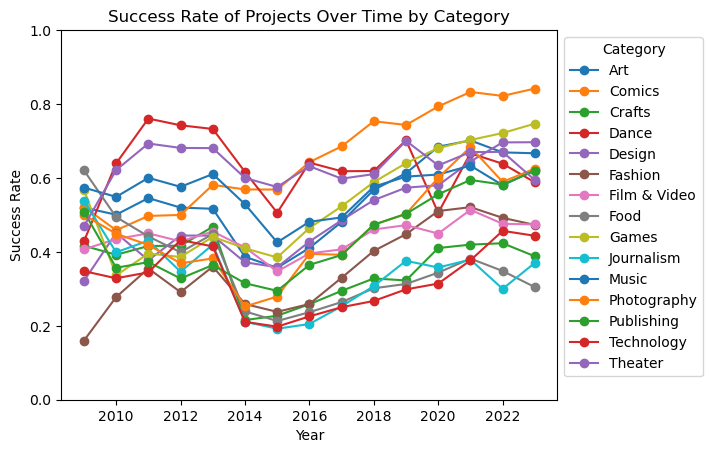

In [79]:
category_df = duckdb.sql(""" SELECT launched_year, category,
                            SUM(CASE 
                                WHEN success = 1 THEN 1 ELSE 0
                                END) * 1.0 / COUNT(*) AS success_rate
                            FROM kickstarter_data 
                            GROUP BY launched_year, category
                            ORDER BY launched_year, category
                            """).df()
unique_categories = category_df['category'].unique() 

for category in unique_categories: 
    category_data = category_df[category_df["category"] == category] 
    plt.plot(category_data["launched_year"], 
             category_data['success_rate'], marker='o', label=category)

plt.title("Success Rate of Projects Over Time by Category") 
plt.xlabel("Year")
plt.ylabel("Success Rate") 
plt.ylim(0, 1) 
plt.legend(title = "Category", loc = "upper left", bbox_to_anchor = (1, 1))
plt.show()

### Duration, Campaign Goal and Success

We wanted to see if success can be predicted from campaign goal and campaign duration because these two variables are two factors that are determined before a campaign is launched compared to variables such as number of backers or amount pledged, which are variables determined after a campaign is launched. goal_usd was log-transformed due to the large range of goal_usd compared to duration_in_days.

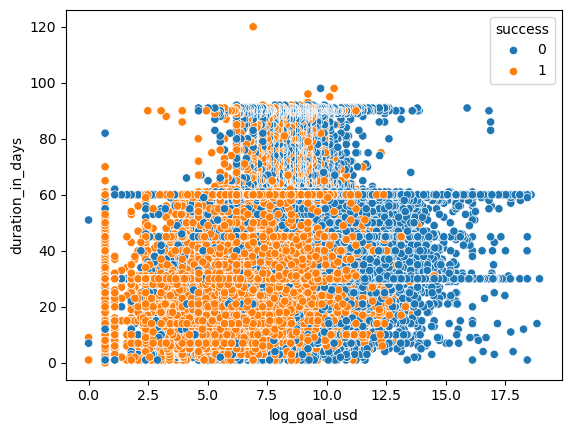

In [8]:
kickstarter_data["log_goal_usd"] = np.log(kickstarter_data["goal_usd"] + 1)

sns.scatterplot(kickstarter_data, x = 'log_goal_usd', y = 'duration_in_days', 
                hue = 'success')
plt.show()

It seems that most campaigns are successful when the log_goal_usd is low and the duration_in_days is also lower. Since it seemed like a lot of data points were centered around the middle of the log_goal_usd, we wondered if log_goal_usd followed a normal distribution or not. 

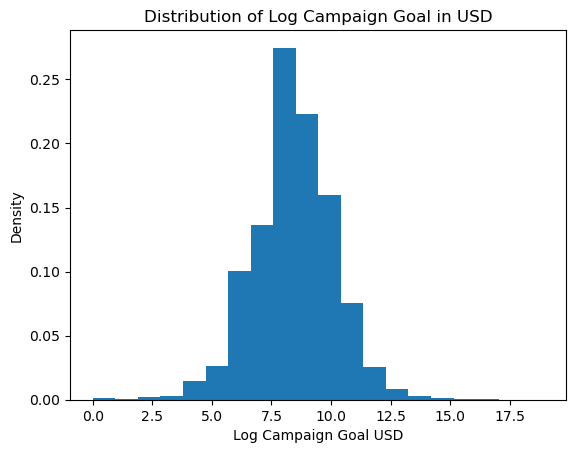

In [9]:
plt.hist(kickstarter_data["log_goal_usd"], 20, density = 1)
plt.title("Distribution of Log Campaign Goal in USD")
plt.xlabel("Log Campaign Goal USD")
plt.ylabel("Density")
plt.show()

The plotted histogram indeed shows that the data looks like it follows a normal distribution with a bell shape. This indicates that majority of the campaigns set their goal to be around the mean, around 1,808 - 8,103 range (7.5 - 9 log range).   

#### Campaign Goal

We wanted to run a regression on the campaign goal of a project and its probability of success to determine its relationship.

In [10]:
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))

The model's coefficient is: -0.35
The model's intercept is: 2.79


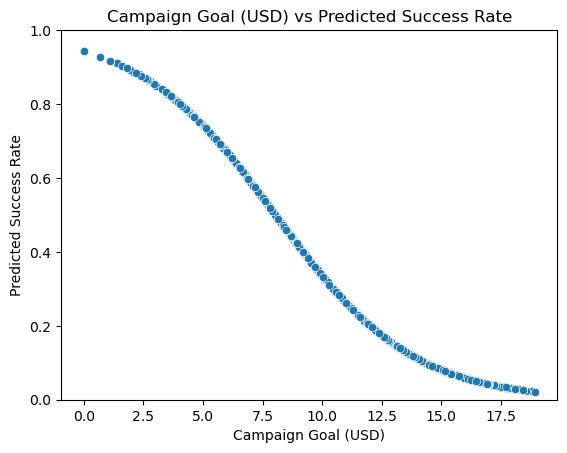

In [11]:
X1 = pd.DataFrame(kickstarter_data["log_goal_usd"])
y1 = pd.Series(kickstarter_data["success"])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=2950)

goal_model = LogisticRegression().fit(X1_train,y1_train)

coefficient = np.round(goal_model.coef_[0][0], 2)
intercept = np.round(goal_model.intercept_[0], 2)
print(f"The model's coefficient is: {coefficient}")
print(f"The model's intercept is: {intercept}")

goal_prediction = goal_model.predict_proba(X1)
kickstarter_data["goal_success_prediction"] = goal_prediction[:,1]
sns.scatterplot(kickstarter_data, x = "log_goal_usd", y = "goal_success_prediction")
plt.title("Campaign Goal (USD) vs Predicted Success Rate")
plt.xlabel("Campaign Goal (USD)")
plt.ylabel("Predicted Success Rate")
plt.ylim(0,1)
plt.show()

#### Campaign Duration

We wanted to run a regression on the length of time of a project and its probability of success. We hypothesize that a project that has been running longer may have more time to promote and find backers, might have a higher probability of success.

The model's coefficient is: -0.03
The model's intercept is: 0.9


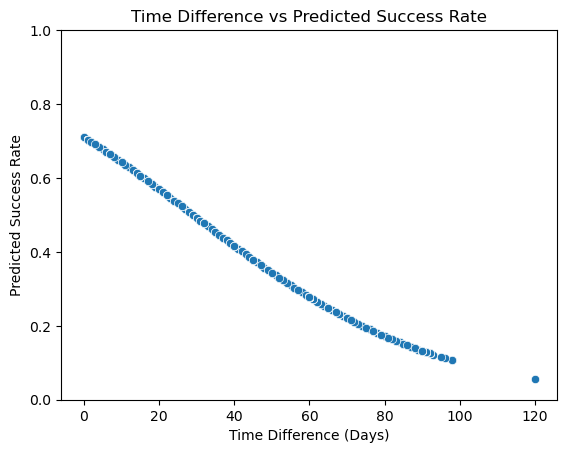

In [12]:
X1 = pd.DataFrame(kickstarter_data["duration_in_days"])
y1 = pd.Series(kickstarter_data["success"])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 2950) 

time_model = LogisticRegression().fit(X1_train,y1_train)
coefficient = np.round(time_model.coef_[0][0], 2)
intercept = np.round(time_model.intercept_[0], 2)
print(f"The model's coefficient is: {coefficient}")
print(f"The model's intercept is: {intercept}")

time_hat_prediction = time_model.predict_proba(X1_train)
time_test_prediction = time_model.predict_proba(X1_test)

#run Logistic Regression on total data to visualize predictions
time_model = LogisticRegression().fit(X1,y1)
time_prediction = time_model.predict_proba(X1)
time_success = time_prediction[:,1]
kickstarter_data["time_success_prediction"] = time_success
sns.scatterplot(kickstarter_data, x = "duration_in_days", y = "time_success_prediction")
plt.title("Time Difference vs Predicted Success Rate")
plt.xlabel("Time Difference (Days)")
plt.ylabel("Predicted Success Rate")
plt.ylim(0,1)
plt.show()

### Campaign's Original Currency vs Average Success Rate
<a name="horiz_currency_bargraph"></a>

We created a new dataframe named 'currency_success_df' to better understand the project's currency, number of successful projects for each respective currency, the total number of projects for each respective currency, to calculate the success rate for projects of each respective currency.

We also calculated the total number of different original currencies there were, which was 15.

The SQL syntax for the CASE WHEN ELSE END statement that was used for sorting each successful project by their project currency and finding the average success rate of for each respective category was found on this website: https://www.w3schools.com/sql/sql_case.asp 

In [13]:
currency_success_df = duckdb.sql("""
SELECT 
    original_currency,
    SUM(CASE 
        WHEN success = 1 THEN 1 
        END) AS num_successful,
    COUNT(*) AS total_projects,
    AVG(CASE 
        WHEN success = 1 THEN 1.0 
        ELSE 0.0 END) AS success_rate
FROM 
    kickstarter_data 
GROUP BY 
    original_currency
ORDER BY num_successful DESC
""").df()

num_diff_currencies = len(currency_success_df)
print(f"The number of different currencies in this dataset is: {num_diff_currencies}")

currency_success_df.iloc[:15]

The number of different currencies in this dataset is: 15


,original_currency,num_successful,total_projects,success_rate
0,USD,178334.0,381263,0.467745
1,GBP,28143.0,55268,0.509210
2,EUR,17256.0,41487,0.415938
3,CAD,10908.0,23889,0.456612
4,AUD,5162.0,12353,0.417874
5,HKD,3038.0,4350,0.698391
6,MXN,2204.0,6377,0.345617
7,SEK,1354.0,3139,0.431348
8,JPY,1289.0,2023,0.637173
9,SGD,1213.0,2331,0.520378


We also calculated the average success rate across all currencies, the min average success rate, and the max average success rate. We graphed the project currency vs average success rate for each respective currency using a horizontal bar graph. 

Kickstarter Project Overall Success Rate: 0.467
Average Success Rate Across Categories: 0.459
Minimum Success Rate of all currencies is 0.346
Maximum Success Rate of all currencies is 0.698


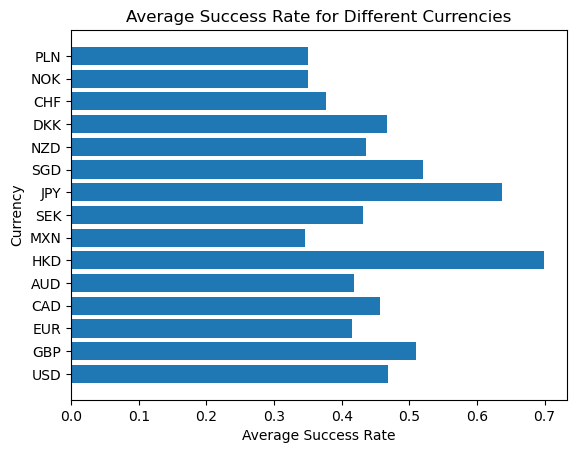

In [14]:
# need to calculate the OVERALL success rate! not the avg of mean of each currency group!
overall_success_rate = currency_success_df['num_successful'].sum() / len(kickstarter_data)
print(f"Kickstarter Project Overall Success Rate: {overall_success_rate:.3f}")

mean_success_rate = currency_success_df['success_rate'].mean()
print(f"Average Success Rate Across Categories: {mean_success_rate:.3f}")

min_success_rate = np.min(currency_success_df['success_rate'])
print(f"Minimum Success Rate of all currencies is {min_success_rate:.3f}")

max_success_rate = np.max(currency_success_df['success_rate'])
print(f"Maximum Success Rate of all currencies is {max_success_rate:.3f}")

currency_success_plot = plt.barh(currency_success_df["original_currency"],
                currency_success_df["success_rate"])

plt.xlabel("Average Success Rate")
plt.ylabel("Currency")
plt.title("Average Success Rate for Different Currencies")
plt.show()

The horizontal bar graph is approximately normally distributed, since the shape of the data is bell-shaped, the data is approximately symmetric about the mean, and there is only one peak in the data. The statistic we are testing for, the average success rate, is normally distributed, so we are able to use the t-test to test whether certain currencies are significantly more successful/unsuccessful than the average projects under other currencies. 

**Hypothesis:** (Two, one-sided t-tests)

1 - The Null Hypothesis, H<sub>0</sub> is that the original currency HKD is not significantly more successful than other Kickstarter campaigns, on average. 

1 - The Alternative Hypothesis, H<sub>1</sub> is that HKD is signficantly more successful than other Kickstarter campaigns, on average.


2 - The Null Hypothesis, H<sub>0</sub> is that the original currency MXN is not significantly less successful than other Kickstarter campaigns, on average. 

2 - The Alternative Hypothesis, H<sub>1</sub> is that MXN is signficantly less successful than other Kickstarter campaigns, on average. 

We created a box and whisker plot to see if any of the datapoints could possibly be outliers and should be examined more closely. 

It is important to note that the median plotted in this box plot is the mean of the averages of each currencies' average success rate, 0.459. The Overall Success Rate of all Kickstarter campaigns is 0.467 which differs slightly.

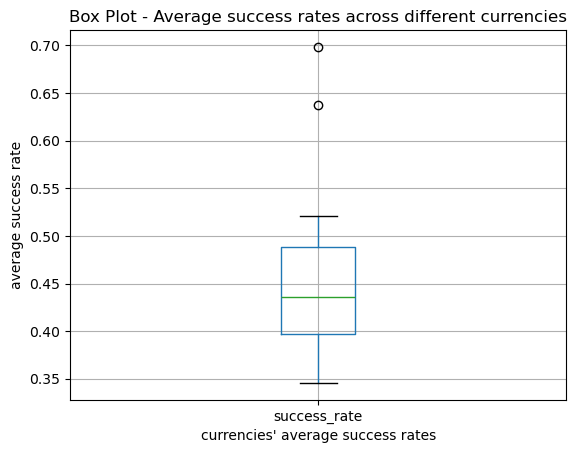

In [15]:
currency_success_df.boxplot(column = "success_rate")
plt.ylabel("average success rate")
plt.xlabel("currencies' average success rates")
plt.title("Box Plot - Average success rates across different currencies")
plt.show()

Using the box and whisker plot, we saw that two currencies lie outside of the IQR of the box and whiskers plot: 
JPY, with a 0.637173 success rate, and HKD, with a 0.698391 success rate, which may indicate that they are outliers and should be further examined. We also observed that MXN is not identified as an outlier in the box and whisker plot above, and is instead included in the first quartile, Q1. 

We would then proceed to do a t-test and find the p-values in order to interpret whether the two null hypotheses identified in the pre-registration statements above can be rejected or not. (link to section that tests pre-registration 2 hypotheses)

### **Pre-registration 1: Multivariable Logistic Regression**

Variables included:
- duration of project (duration_in_days)
- campaign goal (goal_usd)

In [16]:
kickstarter_train, kickstarter_test = train_test_split(kickstarter_data, test_size = 0.3, 
                                                       random_state = 2950)
X = sm.add_constant(kickstarter_train[["log_goal_usd", "duration_in_days"]]) 
y = kickstarter_train['success']

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.644185
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:               377569
Model:                          Logit   Df Residuals:                   377566
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.06754
Time:                        16:11:32   Log-Likelihood:            -2.4322e+05
converged:                       True   LL-Null:                   -2.6084e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.2915      0.020    163.400      0.000       3.252       3.331
log_goal_us

Since the p-values for both variables are 0.000 rounded to the third decimal, this means the p-value is significant as it is less than the alpha level of 0.05. This also indicates for both predictor, campaign goal and campaign duration, we reject the null hypothesis.

As the campaign goal increases, the log odds of success decreases. The coefficient for log_goal_usd is around -0.3149 which indicates with all else equal, for every 1% increase in the campaign goal, the odds of success are multipled by around 0.730, which is a decrease of 27% in odds. 

As the duration increases, the log odds of success decreases. The coefficient for duration_in_days is around -0.0230 which indicates with all else equal, for every additional increase in the campaign duration, the odds of success are multipled by around 0.977, which is a decrease of 2.3% in odds. This is interesting as it is different from our proposed alternative hypothesis that projects with a larger time difference between launched date and deadline date, or duration, will have a greater likelihood of success.

There are limitations to this regression as the constant value indicates that when the predictors variables are zero, the log odds of success is around 3.2869. However, realistically, it is not possible to have a campaign with 0 as its campaign goal and a campaign with a duration of 0. 

### **Pre-registration 2: One-Tailed T-tests**
Using the possible outliers found in the box plot above, we will perform two independent samples t-test to see if the difference between HKD's success rate and the overall success rate, JPY's success rate and the overall success rate, and MXN's success rate and the overall success rate are each statistically signficant or not. 

We want to make sure that these observations are not due to random chance. We also want to test the two hypotheses outlined in the pre-registration statements and see if they can be rejected or if we will fail to reject them. 

To calculate the t-value, we must follow the formula: 
t = (sample mean - population mean) / (sample standard deviation / sqrt(sample size))

This means that we need to calculate the sample mean, the population mean, the sample standard deviation, and the square root of the sample size.

We have already calculated the overall success rate for all kickstarter projects, which is 0.467. 

Our currency_success_df contains the success rate of Kickstarter campaigns with each original currency. 


^ from above, tmr! "We will then need to encode the categorical variables, currency, to numerical ones to conduct an LLS and then check for the significance of certain varaibles in the LLS using the Wald test."

## **Evaluation of Significance**

Bootstrapping Hypothesis on multivariable logistic regression to determine the confidence interval and see if the regression coefficient falls within this confidence interval. 

Optimization terminated successfully.
         Current function value: 0.644185
         Iterations 5
Bootstrap CI: [-0.31895982  3.32522404]


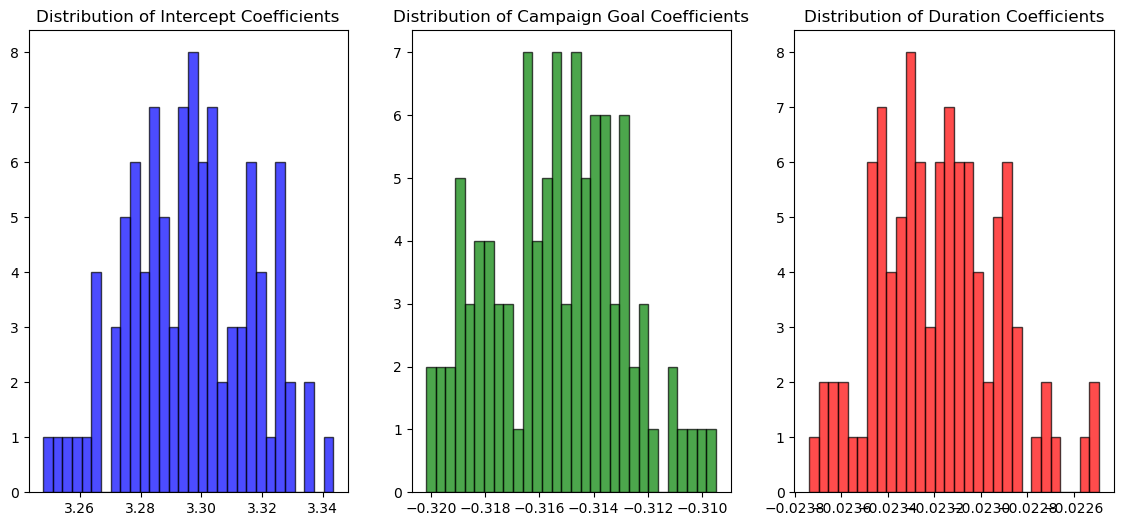

In [17]:
n_iterations = 100
bootstrap_coefs = np.zeros((n_iterations, 3))
X = sm.add_constant(kickstarter_train[['log_goal_usd', 'duration_in_days']]) 
y = kickstarter_train['success'] 
initial_model = sm.Logit(y,X).fit()

for i in range(n_iterations):
    boot_sample = kickstarter_train.sample(n=len(kickstarter_train), replace=True)
    X_boot = sm.add_constant(boot_sample[['log_goal_usd', 'duration_in_days']]) 
    y_boot = boot_sample['success'] 
    boot_model = sm.Logit(y_boot, X_boot).fit(disp=0)
    bootstrap_coefs[i] = boot_model.params
coef_ci = np.quantile(bootstrap_coefs, q=[0.025, 0.975])
print("Bootstrap CI:", coef_ci)

#Visualizing
plt.figure(figsize=(14, 6)) 
plt.subplot(1, 3, 1) 
plt.hist(bootstrap_coefs[:, 0], bins=30, color='blue', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Intercept Coefficients') 
plt.subplot(1, 3, 2) 
plt.hist(bootstrap_coefs[:, 1], bins=30, color='green', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Campaign Goal Coefficients') 
plt.subplot(1, 3, 3) 
plt.hist(bootstrap_coefs[:, 2], bins=30, color='red', alpha=0.7, edgecolor='black') 
plt.title('Distribution of Duration Coefficients')
plt.show()

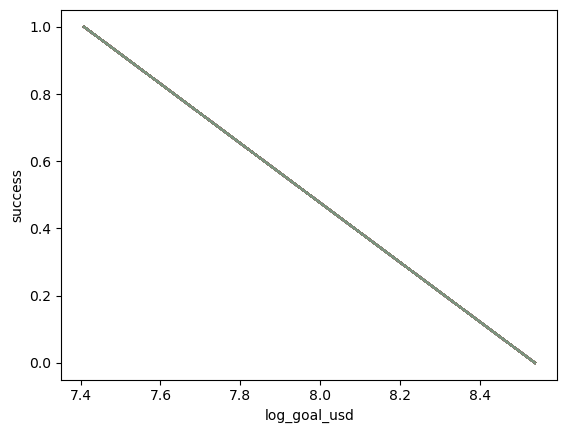

In [18]:
bootstrapped_proj = list()
n_bootstrap = 100

for i in range(n_bootstrap):
    bootstrapped_proj.append(kickstarter_train.sample(n=len(kickstarter_train), replace=True))

domain = np.array([[math.log(1650)], [math.log(5100)]])

for i in range(n_bootstrap):
    df = bootstrapped_proj[i]
    
    X = df[["log_goal_usd"]].values
    y = df["success"]
    bt_model = LogisticRegression().fit(X,y)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x = domain.reshape(-1), y = y_pred, alpha = 0.3)

# Given code
plt.xlabel("log_goal_usd")
plt.ylabel("success")
plt.show()

## **Conclusions**

## **Limitations**

There are several limitations to our research as the data is limited to the Kickstarter public dataset. Since many variables on our public data tsv are restricted, including the project description, we can’t draw a clear relationship between what exactly about a specific category that leads to it being more or less successful than other categories. This affects the meaning of our results because there are unclear causes on why successful a project is successful, as we're only relying on the labels on the Categories of our cleaned data. We can answer our research question on which categories are successful, but can't expand further on the reasons why. 

The cleaned dataset used was also limited as we only used a portion of all the Kickstarter projects. We decided to remove projects that did not have a STATE of success or failed, which were cancelled and suspended campaigns. This indicates that our data analysis is based on solely on success or failed projects, and does not take into account cancelled or suspended campaigns. This binary view on the data can exclude projects that were close to succeeding or had a high probability of succeeding but were dropped last minute. Had those rows been labelled as successful, we could’ve used them to either enforce or counter our results. 

Another limitation in our collected data is that even though we can say that one factor is more directly related to success, there may be outside confounding variables (such as previous popularity of project creator, social media handles, advertising/promotion) that can influence each factor. So, we might not be finding the root causes of successes, and can only base our predictions on the factors given to us.

## **Acknowledgements and Bibliography**

Grad TA Nicholas Guerra guided us to use a LLR and Wald test

We'd like to thank our TAs, (names), for answering our questions and always being responsive to our extra questions that came up between phases of our data science project.

Thank you to all the TAs who were at consulting hours and helped us develop our coding data science skills.
Logit Model Summary https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/ and https://stackoverflow.com/questions/50350816/logistic-regression-get-the-sm-logit-values-python-statsmodels

Side by side plots https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side

Kim, L. (2024, January 29). Kickstarter Data Exploration. https://rstudio-pubs-static.s3.amazonaws.com/1143113_fa2f87ec834e4b0aa8e1a92266455c05.html 


## Questions for Reviewers